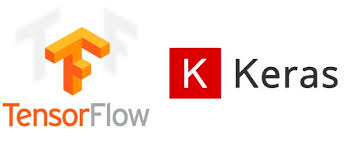

# Operations on a Computational Graph


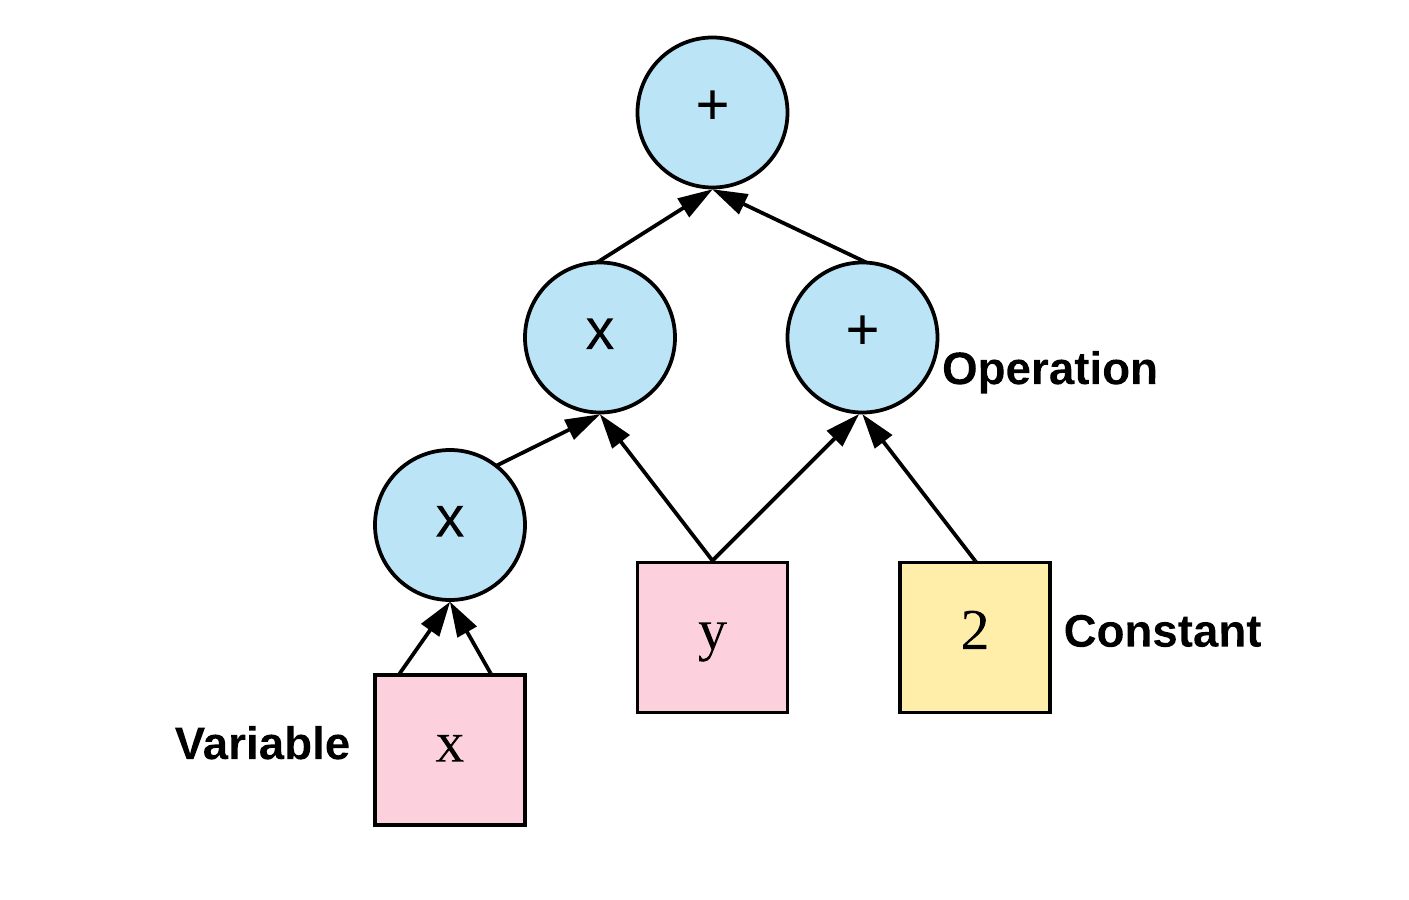

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

### Create tensors

In [3]:
# Create data to feed in the placeholder
x_vals = np.array([1., 3., 5., 7., 9.])

# Create the TensorFlow Placceholder
x_data = tf.placeholder(tf.float32)

# Constant for multilication
m = tf.constant(3.)

<div style="direction:rtl">

برای این که بخواهیم نحوه عملکرد گراف محاسباتی را نمایش دهیم از یک حلقه استفاده می کنیم
</div>


In [4]:
# Multiplication
prod = tf.multiply(x_data, m)
for x_val in x_vals:
    print(sess.run(prod, feed_dict={x_data: x_val}))

3.0
9.0
15.0
21.0
27.0


# Layering Nested Operations

<div style="direction:rtl">
در این بخش می خواهیم نحوه عملکرد بر روی داده های چند بعدی و آرایه های تو در تو را توسط گراف محاسباتی نمایش می دهیم. در ابتدا موارد زیر را تعریف می کنیم: 

- Tensors
- Constants
- Placeholders

</div>

In [5]:
# Create data to feed in
my_array = np.array([[1., 3., 5., 7., 9.],
                   [-2., 0., 2., 4., 6.],
                   [-6., -3., 0., 3., 6.]])
# Duplicate the array for having two inputs
x_vals = np.array([my_array, my_array + 1])
# Declare the placeholder
x_data = tf.placeholder(tf.float32, shape=(3, 5))
# Declare constants for operations
m1 = tf.constant([[1.],[0.],[-1.],[2.],[4.]])
m2 = tf.constant([[2.]])
a1 = tf.constant([[10.]])


<div style="direction:rtl">    
### تعریف عملگرها
در ابتدا ما از ضرب ماتریسی استفاده می کنیم. که قرار است دو ماتریس زیر را در هم ضرب کند
</div>

`(A[3x5] * m1[5x1]) = prod1[3x1]`

In [6]:
# 1st Operation Layer = Multiplication
prod1 = tf.matmul(x_data, m1)


<div style="direction:rtl">    
ضرب دوم بین نتیجه خروجی دوم و ماتریس m2  
</div>

`(A[3x5] * m1[5x1]) = prod1[3x1]`

In [7]:
# 2nd Operation Layer = Multiplication
prod2 = tf.matmul(prod1, m2)

<div style="direction:rtl">    
در نهایت مقدار خروجی را با مقدار بایاس جمع می کنیم 
</div>


`prod2[3x1] + a1[1x1]`

In [8]:
# 3rd Operation Layer = Addition
add1 = tf.add(prod2, a1)

<div style="direction:rtl">    
مقدار داده ها را به گراف محاسباتی می فرستیم. برای این منظور از feed_dict استفاده می کنیم  
</div>


In [9]:
for x_val in x_vals:
    print(sess.run(add1, feed_dict={x_data: x_val}))

[[102.]
 [ 66.]
 [ 58.]]
[[114.]
 [ 78.]
 [ 70.]]


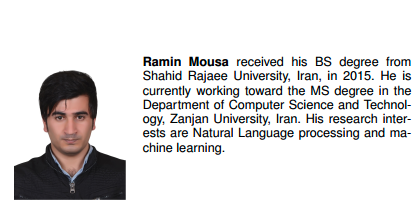